<a href="https://colab.research.google.com/github/simply-ark0/Weather-Prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing libraries**

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/ML DataSets/weather.csv")

In [ ]:
#Data Exploration
dataset.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [ ]:
dataset.shape

(10000, 8)

##**Data Pre-processing**

###**Dropping Humidity Column**

In [ ]:
dataset = dataset.drop(['Description'], axis = 1)

In [ ]:
dataset.shape

(10000, 7)

###**Checking for missing values**

In [ ]:
dataset.isna().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
dtype: int64

**Conclusion:** The dataset does not have missing values

###**Checking for Duplicate rows**

In [ ]:
dataset.duplicated().any()

True

In [ ]:
dataset = dataset.drop_duplicates()
dataset.shape

(9999, 7)

**Conclusion:** There was one duplicate row and it is handled by deleting it.

###**Checking for Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

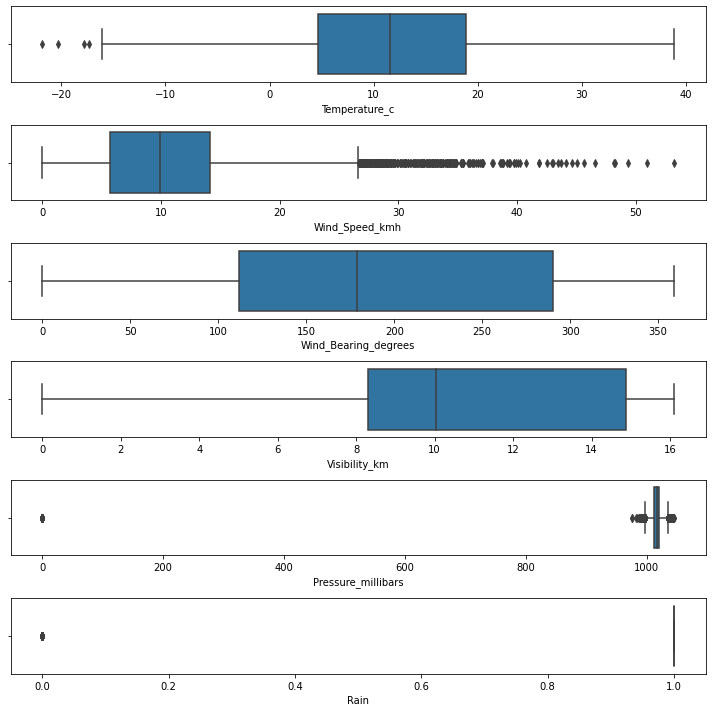

In [ ]:
fig, axs = plt.subplots(6, figsize = (10,10))
plt1 = sns.boxplot(dataset['Temperature_c'], ax = axs[0])
plt1 = sns.boxplot(dataset['Wind_Speed_kmh'], ax = axs[1])
plt1 = sns.boxplot(dataset['Wind_Bearing_degrees'], ax = axs[2])
plt1 = sns.boxplot(dataset['Visibility_km'], ax = axs[3])
plt1 = sns.boxplot(dataset['Pressure_millibars'], ax = axs[4])
plt1 = sns.boxplot(dataset['Rain'], ax = axs[5])

plt.tight_layout()

**Conclusion:** There are outlier values in attributes: "Temperature_c", "Wind_Speed_kmh" & "Pressure_millibars"

In [ ]:
# Handling Outliers for Attribute: "Temperature_c"
temp_Q1 = dataset["Temperature_c"].quantile(0.25)
temp_Q3 = dataset["Temperature_c"].quantile(0.75)
print(temp_Q1, temp_Q3)
temp_IQR = temp_Q3 - temp_Q1
temp_max = temp_Q3 + 1.5*temp_IQR
temp_min = temp_Q1 - 1.5*temp_IQR
Median = dataset["Temperature_c"].quantile(0.50)
# print(Median)
dataset.loc[dataset.Temperature_c > temp_max , 'Temperature_c'] = np.nan
dataset.loc[dataset.Temperature_c < temp_min , 'Temperature_c'] = np.nan
dataset.fillna(Median,inplace = True)

4.7 18.82222222


In [ ]:
# Handling Outliers for Attribute:"Wind_Speed_kmh"
wind_Q1 = dataset["Wind_Speed_kmh"].quantile(0.25)
wind_Q3 = dataset["Wind_Speed_kmh"].quantile(0.75)
print(wind_Q1, wind_Q3)
wind_IQR = wind_Q3 - wind_Q1
wind_max = wind_Q3 + (1.5*wind_IQR)
wind_min = wind_Q1 - (1.5*wind_IQR)
Median = dataset["Wind_Speed_kmh"].quantile(0.50)
# print(Median)
dataset.loc[dataset.Wind_Speed_kmh > wind_max , 'Wind_Speed_kmh'] = np.nan
dataset.loc[dataset.Wind_Speed_kmh < wind_min , 'Wind_Speed_kmh'] = np.nan
dataset.fillna(Median,inplace = True)

5.7477 12.9927


In [ ]:
# Handling Outliers for Attribute:"Pressure_millibars"
pres_Q1 = dataset["Pressure_millibars"].quantile(0.25)
pres_Q3 = dataset["Pressure_millibars"].quantile(0.75)
print(pres_Q1, pres_Q3)
pres_IQR = pres_Q3 - pres_Q1
pres_max = pres_Q3 + (1.5*pres_IQR)
pres_min = pres_Q1 - (1.5*pres_IQR)
PMedian = dataset["Pressure_millibars"].quantile(0.50)
# print(Median)
dataset.loc[dataset.Pressure_millibars > pres_max , 'Pressure_millibars'] = np.nan
dataset.loc[dataset.Pressure_millibars < pres_min , 'Pressure_millibars'] = np.nan
dataset.fillna(PMedian,inplace = True)

1012.74 1020.125


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

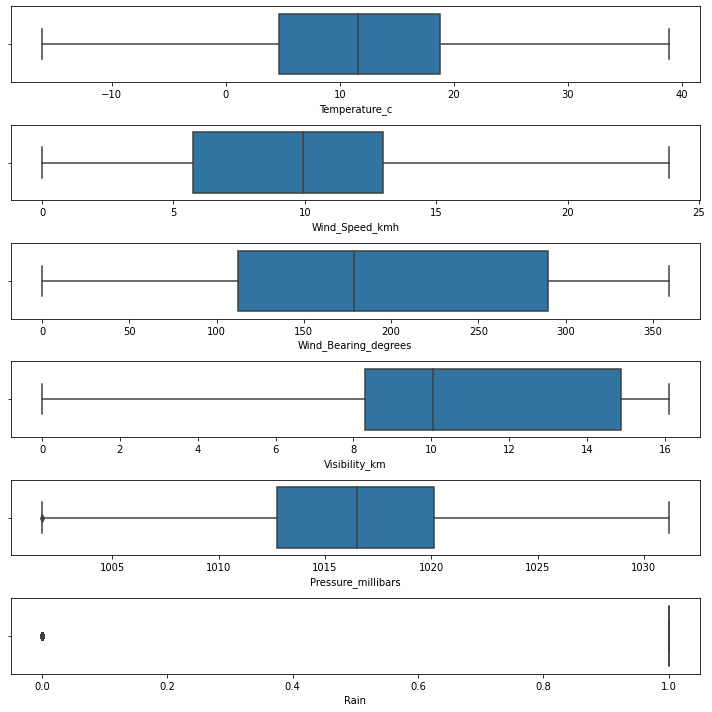

In [ ]:
fig, axs = plt.subplots(6, figsize = (10,10))
plt1 = sns.boxplot(dataset['Temperature_c'], ax = axs[0])
plt1 = sns.boxplot(dataset['Wind_Speed_kmh'], ax = axs[1])
plt1 = sns.boxplot(dataset['Wind_Bearing_degrees'], ax = axs[2])
plt1 = sns.boxplot(dataset['Visibility_km'], ax = axs[3])
plt1 = sns.boxplot(dataset['Pressure_millibars'], ax = axs[4])
plt1 = sns.boxplot(dataset['Rain'], ax = axs[5])

plt.tight_layout()

**Conclusion:** The outliers in the 3 attribites ("Temperature_c", "Wind_Speed_kmh" & "Pressure_millibars") are handeled by replaced by then mean of the corresponding Attributes.

##**Exploratory Data Analysis**

###**Distribution of the target variable**

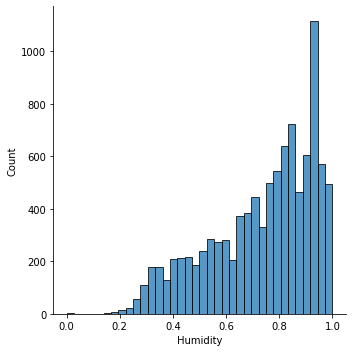

In [ ]:
sns.displot(dataset['Humidity'])

###**How Humidity is related to other variables**

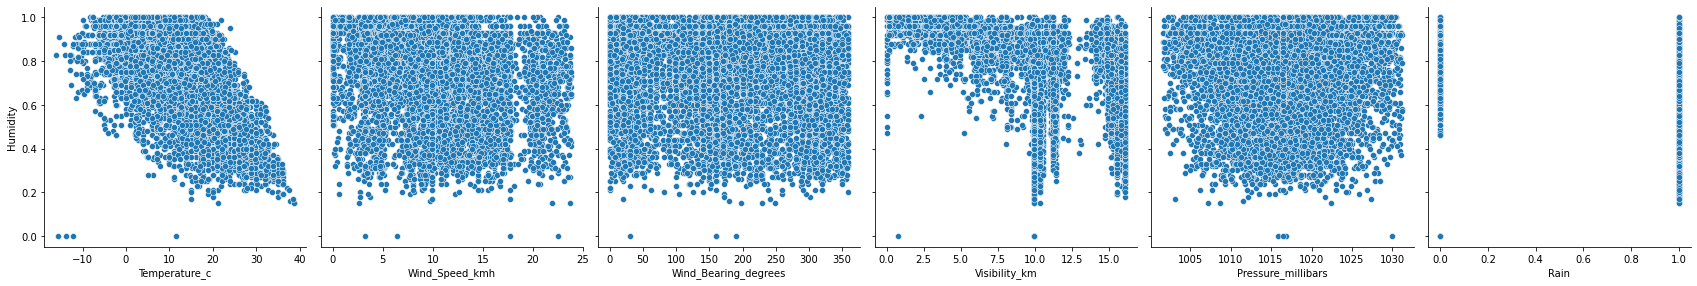

In [ ]:
sns.pairplot(dataset, x_vars = ['Temperature_c', 'Wind_Speed_kmh', 'Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Rain'], y_vars = 'Humidity', height = 4, aspect = 1, kind = 'scatter')
plt.show()

**Conclusion:** Temprature seems more Correlated

###**Heatmap**

<function matplotlib.pyplot.show>

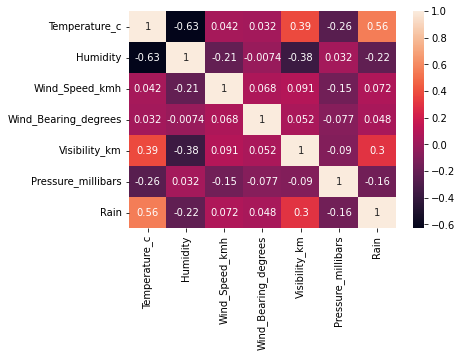

In [ ]:
sns.heatmap(dataset.corr(), annot = True)
plt.show

**Conclusion:** Tempurature seems to be most correlated with Sales as 0.56.

##**Model Building**

###**Simple Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
#Setting the value for X and Y
x = dataset[['Temperature_c']]
y = dataset['Humidity']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
slr = LinearRegression()
slr.fit(x_train.values, y_train)

LinearRegression()

In [ ]:
#Printing Model Coefficients
print('Intercept: ', slr.intercept_)
print('Coeffients: ', slr.coef_)

Intercept:  0.8917744500928522
Coeffients:  [-0.01312849]


In [ ]:
print('Regressing Equation: Humidity = 0.891 - 0.0130 * Tempurature')

Regressing Equation: Humidity = 0.891 - 0.0130 * Tempurature


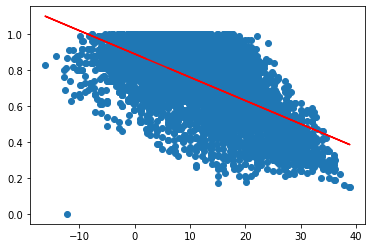

In [ ]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 0.891 - 0.0130 * x_train, "r")
plt.show()

In [ ]:
#Prediction of test and training set Result
y_pred_slr = slr.predict(x_test.values)
x_pred_slr = slr.predict(x_train.values)
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [0.52548953 0.84772107 0.67792591 ... 0.74736104 0.65845198 0.6020724 ]


In [ ]:
#Actual value and Predicted Value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
9707,0.46,0.525490
9335,0.76,0.847721
3854,0.47,0.677926
2029,0.82,0.799000
3539,0.78,0.884481
...,...,...
4208,0.93,0.811545
5334,0.62,0.629278
2554,0.77,0.747361
13,0.73,0.658452


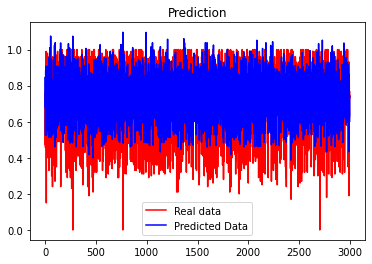

In [ ]:
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(y_pred_slr, color = 'blue', label = 'Predicted Data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
#Predict for any value
slr.predict([[16.5613]])

array([0.67434956])

Conclusion: For value of Temperature_c = 16.5613, the predicted value of Humidity is 0.67434956

In [ ]:
#Print R-Sqared Value for the model
from sklearn.metrics import top_k_accuracy_score
print('R squared value of the model: {:.2f}',format(slr.score(x,y)*100))

R squared value of the model: {:.2f} 39.7884745562884


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.12421694595055831
Mean Square Error: 0.024034927145467583
Root mean Square Error: 0.15503201974259248


###**Multiple Linear Regression**

In [ ]:
#Setting the value for X and Y
x = dataset[['Temperature_c', 'Wind_Speed_kmh', 'Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars']]
y = dataset['Humidity']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train.values, y_train)

LinearRegression()

In [ ]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

6.696162646493726


[('Temperature_c', -0.012796573272048452),
 ('Wind_Speed_kmh', -0.007607398069483227),
 ('Wind_Bearing_degrees', 2.5128751938195e-05),
 ('Visibility_km', -0.006197901754660219),
 ('Pressure_millibars', -0.005582693469557929)]

In [ ]:
#Predicting the Test and Train set result
y_pred_mlr= mlr.predict(x_test.values)
x_pred_mlr= mlr.predict(x_train.values)

In [ ]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.47286494 0.75767577 0.57754044 ... 0.75595975 0.72914123 0.64372999]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
9707,0.46,0.472865
9335,0.76,0.757676
3854,0.47,0.577540
2029,0.82,0.802006
3539,0.78,0.822753
...,...,...
4208,0.93,0.828740
5334,0.62,0.656251
2554,0.77,0.755960
13,0.73,0.729141


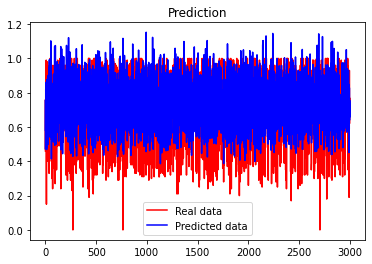

In [ ]:
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(y_pred_mlr, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
#Predict for any value
mlr.predict([[16.5613, 16.0124, 160, 10.461, 1020.32]])

array([0.60547261])

**Conclusion:** For values of Temperature_c = 16.5613, Wind_Speed_kmh = 16.0124, Wind_Bearing_degrees = 160, Visibility_km = 10.461, Pressure_millibars = 1020.32, the predicted value of Humidity is 0.60547261

In [ ]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 47.51


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.11543640992395081
Mean Square Error: 0.02115082387095213
Root Mean Square Error: 0.14543322822158672
